**Análisis de Video Juegos**

In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns 
from scipy import stats as st

In [2]:
games = pd.read_csv('/datasets/games.csv')
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
all_lower = []

for old_columns in games.columns:
    name_lower = old_columns.lower()
    all_lower.append(name_lower)

games.columns = all_lower

print(games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [5]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [6]:
games.duplicated().sum()

0

In [7]:
games['name'] = games['name'].fillna('unknown')

games['year_of_release'] = games['year_of_release'].fillna(0).astype(int)

games['genre'] = games['genre'].fillna('unknown')

games['user_score'] = games['user_score'].replace('tbd', np.nan)
games['user_score'] = games['user_score'].astype(float)

games['rating'] = games['rating'].fillna('unknown')

games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


**Columnas tipo object:** cambie los valores nulos por 'unknown' con la intencion de que sea  mas entendible para otras personas.

**Columnas tipo float:** Deje los valores nulos para poder hacer operaciones y gráficas sin errores y obtener NaN en caso de necesitar operaciones entre columnas. En el caso específico de 'user_score', cambie los valores 'tbd', por valores nulos para poder convertir el tipo de dato a float en caso de que tenga que analizar el promedio de las críticas o alguna otra operación.

**Columna tipo int:** En el caso de 'year_of_release', cambié los datos nulos a 0 para poder cambiarlo de float a int y no confundirlo con un año real

In [8]:
games_null = games[games.isna().any(axis=1)]
games_null

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,unknown
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown


In [9]:
games_no_year = games[games['year_of_release'] == 0]
games_no_year

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,0,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,0,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,0,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,unknown
609,Space Invaders,2600,0,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,unknown
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,0,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,0,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,0,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,0,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,unknown


**Datos ausentes** 

En el caso de 'name' y 'year_of_release' probablemente no se agregó el dato devido a algún error, aunque en caso de ser necesario podríamos llenar la informacion manualmente ya que son datos que podemos buscar en internet. En el caso de 'critic_score', 'user_score', 'rating'  podemos ver que los datos auscentes empatan con años anteriores a 1999, probablemente para entonces no se hacian estos ratings, o a datos con menos de 1 millon de ventas, probablemente se consideró que no hubo ventas suficientes para generar un rating

In [10]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games = games[['name','platform','year_of_release','genre','na_sales','eu_sales','jp_sales','other_sales','total_sales','critic_score','user_score','rating']]
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,unknown


In [11]:
games_per_year = games[games['year_of_release'] > 0]
games_per_year = games_per_year.groupby('year_of_release').size()
games_per_year

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
dtype: int64

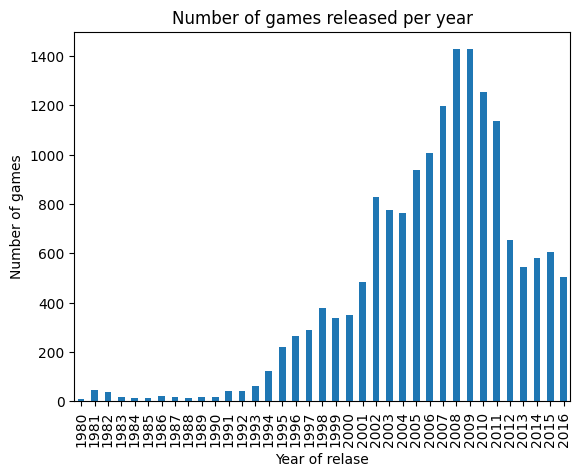

In [12]:
games_per_year.plot(kind = 'bar',
                    xlabel = 'Year of relase',
                   ylabel = 'Number of games',
                   title = 'Number of games released per year')
plt.show() 

In [14]:
top_platforms = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(6)
top_platforms

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
Name: total_sales, dtype: float64

In [15]:
filtered = games[games['platform'].isin(top_platforms.index)]
filtered = filtered[filtered['year_of_release'] > 0]

sales_per_platform = filtered.pivot_table(index=['year_of_release'], 
                                       columns='platform', 
                                       values='total_sales', 
                                       aggfunc='sum')
sales_per_platform

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1985,0.02,NaN,NaN,NaN,NaN,NaN
1994,NaN,6.03,NaN,NaN,NaN,NaN
1995,NaN,35.96,NaN,NaN,NaN,NaN
1996,NaN,94.70,NaN,NaN,NaN,NaN
1997,NaN,136.17,NaN,NaN,NaN,NaN
1998,NaN,169.49,NaN,NaN,NaN,NaN
1999,NaN,144.53,NaN,NaN,NaN,NaN
2000,NaN,96.37,39.17,NaN,NaN,NaN
2001,NaN,35.59,166.43,NaN,NaN,NaN


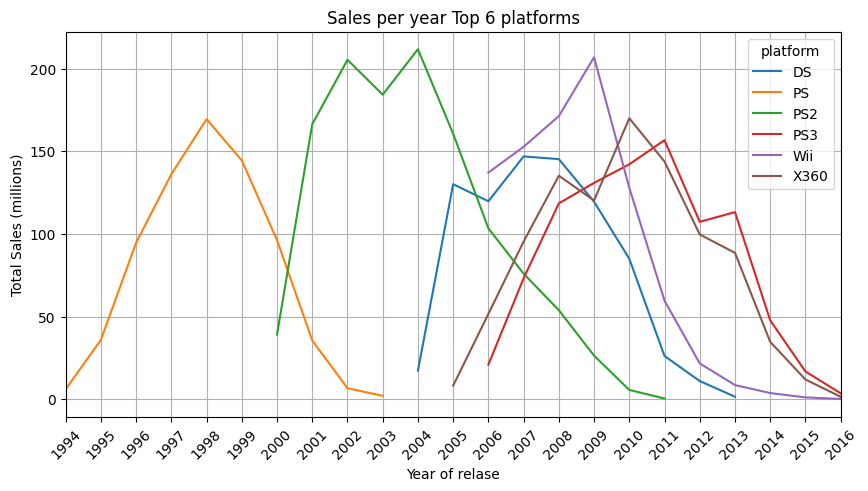

In [16]:
sales_per_platform.plot(kind='line',
                        title= 'Sales per year Top 6 platforms',
                        xlabel= 'Year of relase',
                        ylabel= 'Total Sales (millions)',
                        grid=True,
                        figsize=[10,5],
                        xlim= [1994,2016])
plt.xticks( ticks=[year for year in sales_per_platform.index if 1994 <= year <= 2016],
    rotation=45)
plt.show()

In [18]:
platform_life_span = filtered.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_life_span['useful_life'] = platform_life_span['max'] - platform_life_span['min']
print(platform_life_span.sort_values(by='min'))

           min   max  useful_life
platform                         
DS        1985  2013           28
PS        1994  2003            9
PS2       2000  2011           11
X360      2005  2016           11
PS3       2006  2016           10
Wii       2006  2016           10


**Vida de las plataformas**

Aunque en general las plataformas tienen una vida útil de alrededor de 10 años, estas suelen alcanzar su pico de ventas durante los primeros 3 a 4 años. A partir de ese punto, las ventas comienzan a disminuir de forma gradual hasta casi desaparecer, siendo reemplazadas por nuevas plataformas.

Normalmente, una nueva plataforma aparece poco después del pico de ventas de la anterior, marcando una transición natural en el mercado. A pesar del incremento en la cantidad de plataformas lanzadas a partir de 2004, todas siguen el mismo patrón: un ciclo de vida que gira en torno a los 10 años, con una curva de adopción y declive bastante predecible.

En cuanto a que plataformas son potencialmente rentables. En la grafica podemos ver que estamos parados en un año (2016), en el que ya pasó la vido útil de todas las consolas más populares, por lo que ninguna de ellas parece ser una opcion rentable. Yo sugeriría hacer una investigacion de cuáles van a ser los nuevos lanzamientos, tomando en cuenta las opiniones de la gente sobre los nuevos productos para encontrar una nueva plataforma por la cual apostar. 

En caso de que se vaya a lanzar una nueva consola PS yo sugeriría comprarlas en poca medida  ya que aun que podemos ver que fuue la consola mas popular durente 10 años, en su último lanzamiento bajaron las ventas, fueron superados por nuevas consolas y desde 2013 dejaron de aparecer en la gráfica de las plataformas mas populares lo que me hace pensar que no le queda mucho tiempo mas en el mercado.

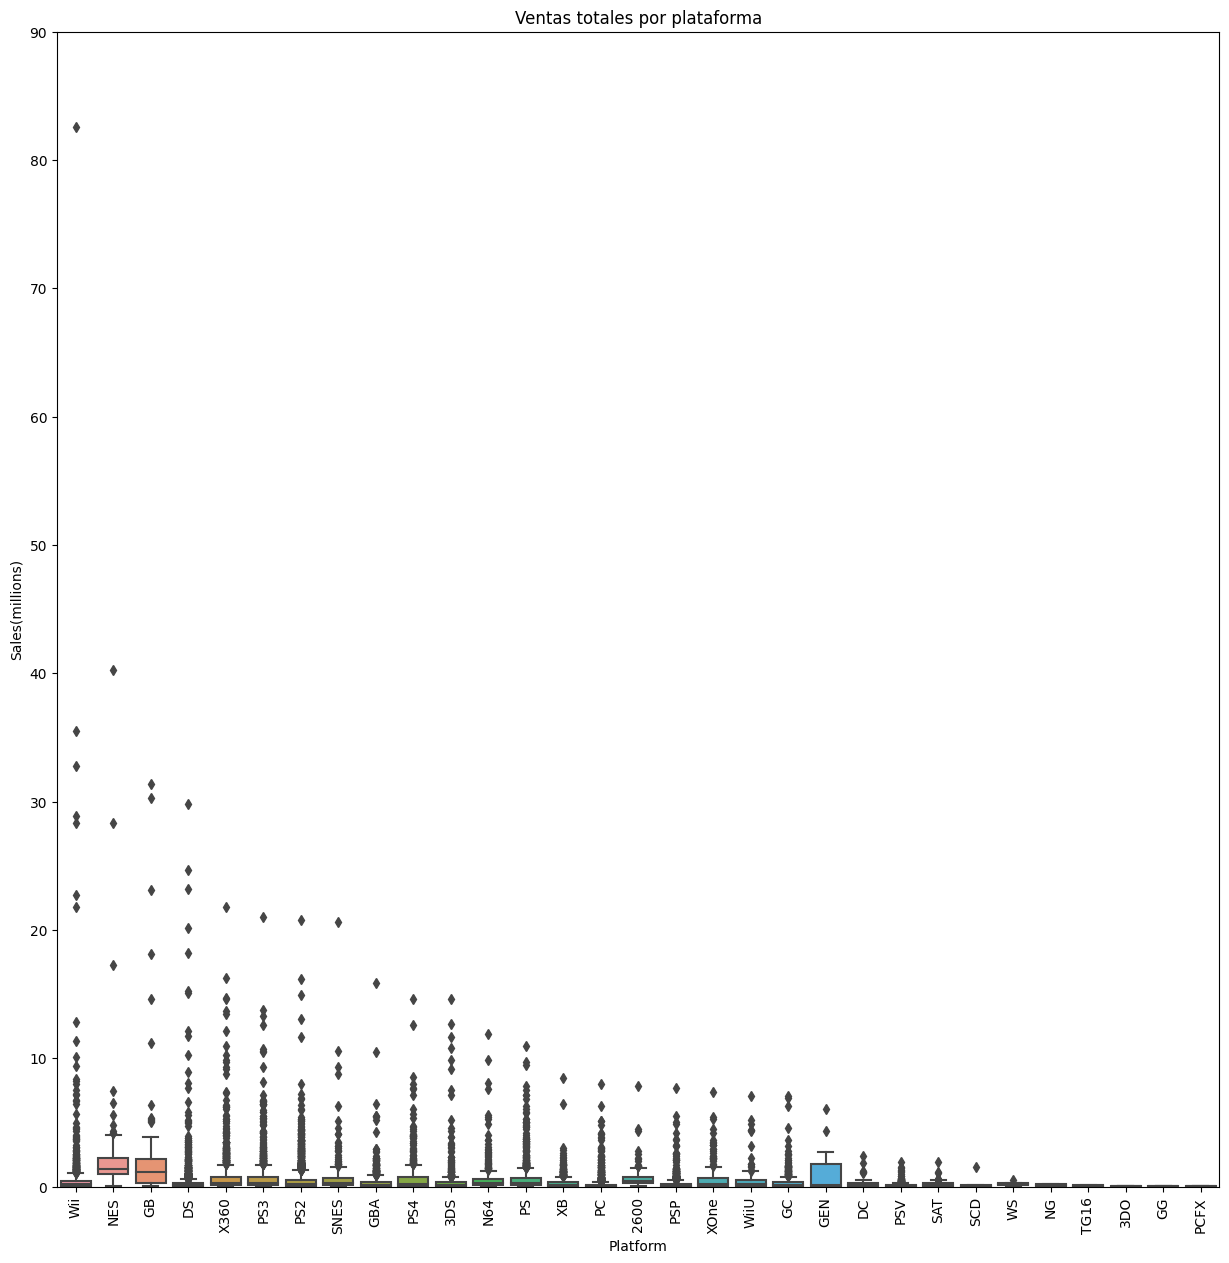

In [19]:
plt.figure(figsize=(15, 15)) 
sales_per_platform = sns.boxplot(data=games, 
                                 x='platform', 
                                 y='total_sales')
plt.ylabel('Sales(millions)') 
plt.xlabel('Platform')  
plt.title('Ventas totales por plataforma')  
plt.xticks(rotation=90)
plt.ylim(0, 90)
plt.show()

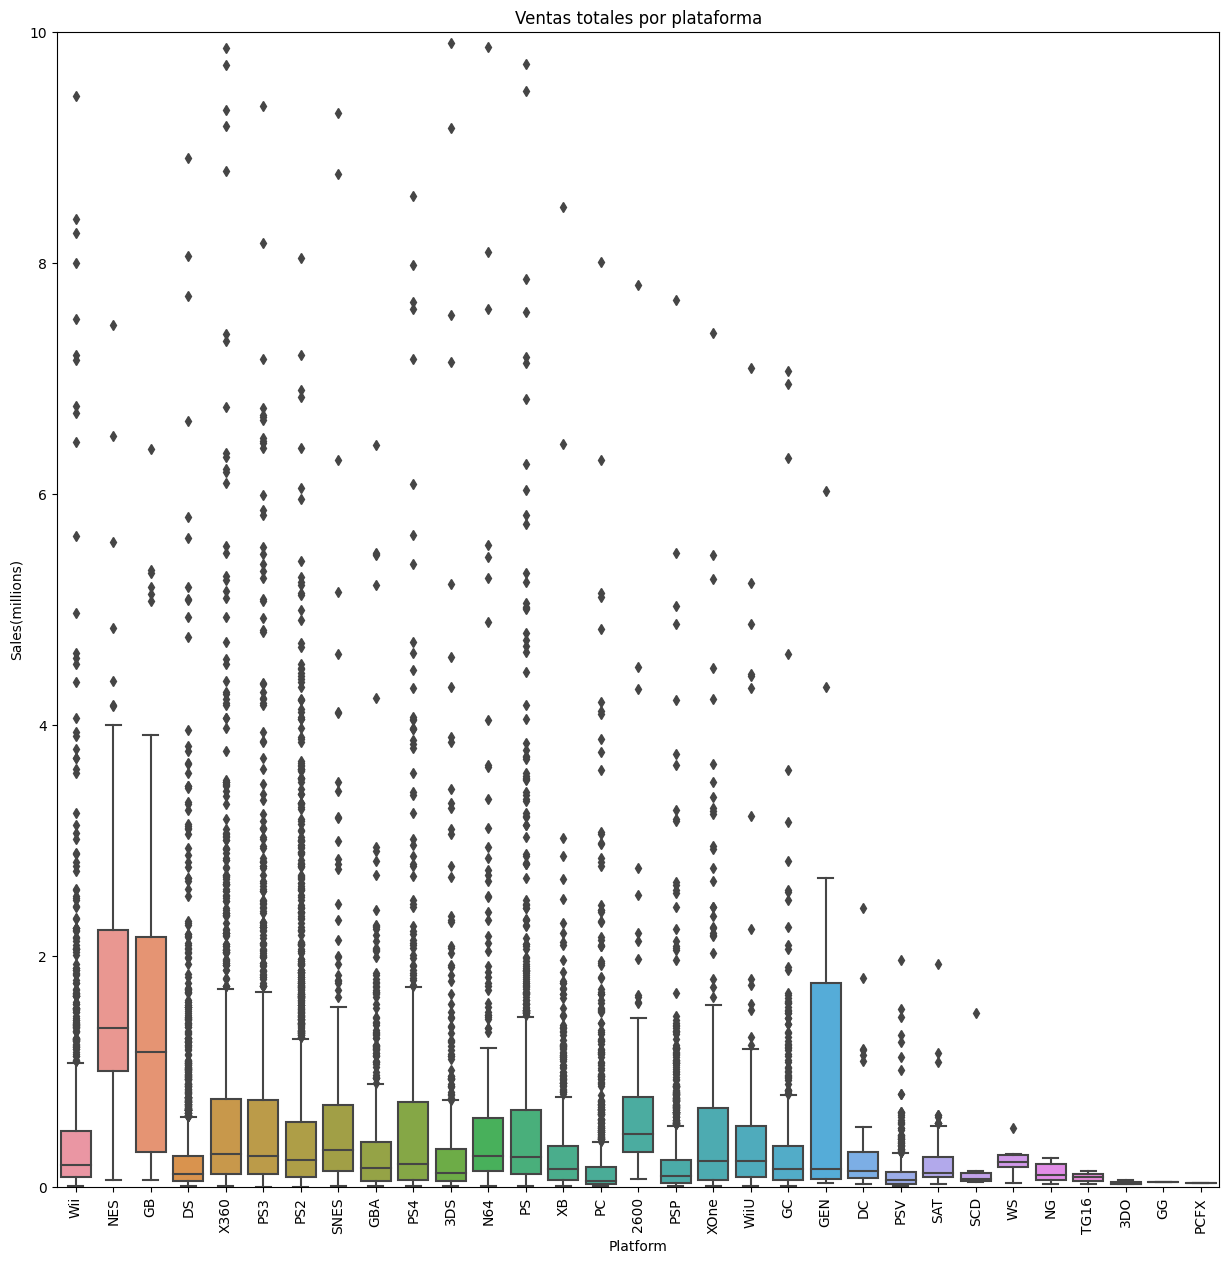

In [20]:
plt.figure(figsize=(15, 15)) 
sales_per_platform = sns.boxplot(data=games, 
                                 x='platform', 
                                 y='total_sales')
plt.ylabel('Sales(millions)') 
plt.xlabel('Platform')  
plt.title('Ventas totales por plataforma')  
plt.xticks(rotation=90)
plt.ylim(0,10)
plt.show()

Con este diagramoa de caja podemos ver que la media de las ventas de casi todas las plataformas está por debajo del millon de dolares, sinenbargo NES y GB tiene una media mucho mayor al resto.

In [21]:
critic_score_x360 = games[games['platform']== 'X360']
critic_score_x360 = critic_score_x360.dropna()
critic_score_x360['mean_score'] = ((critic_score_x360['critic_score']/10) + (critic_score_x360['user_score']))/2
critic_score_x360

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating,mean_score
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,21.82,61.0,6.3,E,6.20
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,16.27,97.0,8.1,M,8.90
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,14.73,88.0,3.4,M,6.10
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,14.62,87.0,6.3,M,7.50
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,13.68,83.0,4.8,M,6.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15613,The Testament of Sherlock Holmes,X360,2012,Adventure,0.00,0.02,0.00,0.00,0.02,64.0,7.6,M,7.00
15625,Marvel Avengers: Battle for Earth,X360,2012,Action,0.02,0.00,0.00,0.00,0.02,62.0,7.3,T,6.75
15743,Worms,X360,2007,Strategy,0.00,0.02,0.00,0.00,0.02,75.0,6.9,E10+,7.20
16311,Banjo-Kazooie,X360,2008,Platform,0.00,0.01,0.00,0.00,0.01,77.0,8.2,E,7.95


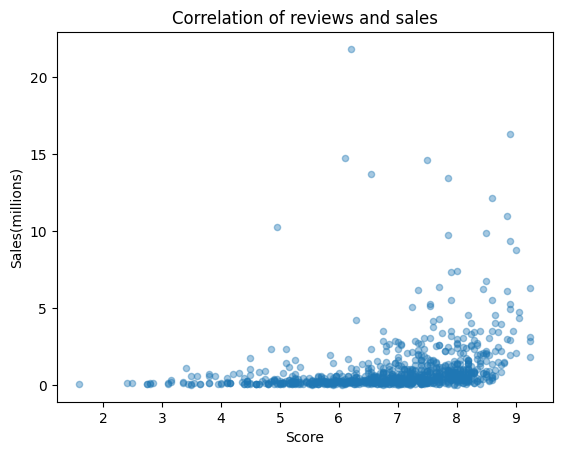

In [22]:
critic_score_x360.plot(kind='scatter',
                       x = 'mean_score',
                       y = 'total_sales',
                       title = 'Correlation of reviews and sales',
                       xlabel = 'Score',
                       ylabel = 'Sales(millions)',
                       alpha = 0.4)
plt.show()

In [23]:
correlation = critic_score_x360['mean_score'].corr(critic_score_x360['total_sales'])
correlation

0.28515126725241746

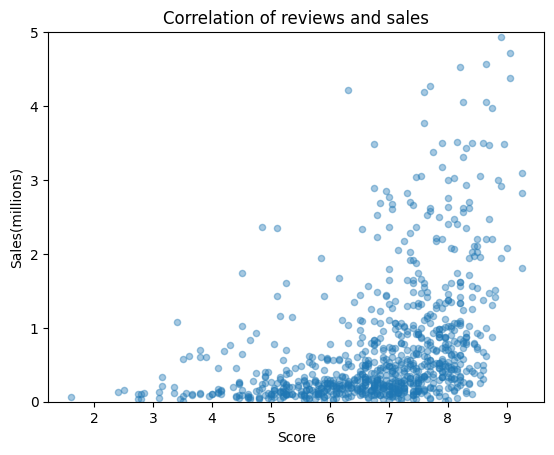

In [24]:
critic_score_x360.plot(kind='scatter',
                       x = 'mean_score',
                       y = 'total_sales',
                       title = 'Correlation of reviews and sales',
                       xlabel = 'Score',
                       ylabel = 'Sales(millions)',
                       alpha = 0.4,
                       ylim = [0,5])
plt.show()

In [23]:
correlation = critic_score_x360[critic_score_x360['total_sales'] <= 5]['mean_score'].corr(critic_score_x360[critic_score_x360['total_sales'] <= 5]['total_sales'])
print(correlation)

0.42311568526610477


**Correlación**

El primer gráfico nos muestra algunos datos qu están irregulares ya que se están mucho más arriba que el resto. Lo que nos hace pensar que esto puede ser lo que nos está causando cuna correlación tan baja. Sin embargo una vez que filtramos los datos seguimos oteniendo una correlacíon algo baja, lo que nos indica que hay otros factores ademas de las criticas que afectan el numero de ventas.

In [25]:
games_multiplatform = games.groupby('name').size().sort_values(ascending= False)
games_multiplatform.head(10)

name
Need for Speed: Most Wanted     12
Madden NFL 07                    9
FIFA 14                          9
LEGO Marvel Super Heroes         9
Ratatouille                      9
Madden NFL 08                    8
FIFA Soccer 13                   8
Cars                             8
Lego Batman 3: Beyond Gotham     8
FIFA 15                          8
dtype: int64

In [26]:
need_for_speed_sales_2005 = games[(games['name'] == 'Need for Speed: Most Wanted') & (games['year_of_release'] == 2005)].sort_values('total_sales')
need_for_speed_sales_2005

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
6473,Need for Speed: Most Wanted,GBA,2005,Racing,0.19,0.07,0.00,0.00,0.26,NaN,8.3,E
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,0.27,45.0,6.1,E
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,0.29,82.0,8.5,T
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,0.56,80.0,9.1,T
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,1.04,83.0,8.8,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,1.25,83.0,8.5,T
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,4.37,82.0,9.1,T


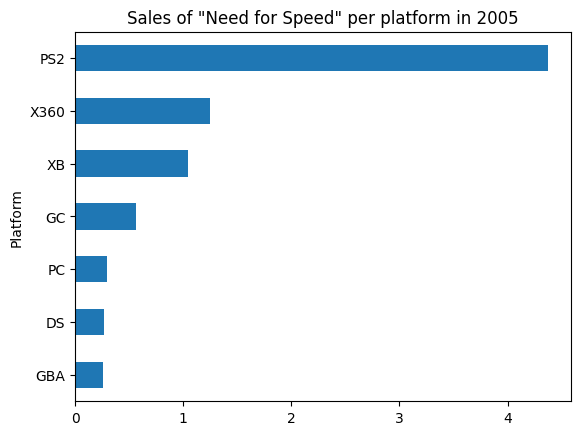

In [27]:
need_for_speed_sales_2005.plot(x= 'platform',
                               y= 'total_sales',
                               xlabel= 'Platform',
                               ylabel= 'Total sales(millions)',
                               kind= 'barh',
                               title= 'Sales of "Need for Speed" per platform in 2005',
                              legend=False)
plt.show()

Esta gráfica nos muestra claramente que el numero de ventas de un juego puede variar mucho según la plataforma. En el caso de "Need for Speed" en 2005 tuvo mas ventas para la plataforma PS2 lo cual hace mucho sentido ya que si revisamos la grafica 'Sales per year Top 6 platforms', PS2 era la plataforma más popular durante 2005.

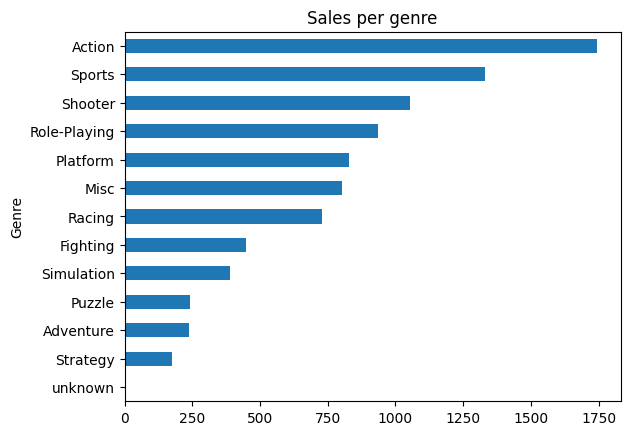

In [28]:
sales_per_genre = games.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values('total_sales' )
sales_per_genre.plot(xlabel= 'Genre',
                     ylabel= 'Total sales(millions)',
                     kind= 'barh',
                     title= 'Sales per genre',
                     legend=False)
plt.show()

Este último gráfico nos muestra que el genero del juego es un factor importante a considerar para calcular el número de ventas, aunque sería importante checar como cambian las ventas según el génro cada año

In [29]:
region = games.pivot_table(index= ['platform','genre','rating'],  
                           values=['na_sales','eu_sales','jp_sales','total_sales'], 
                           aggfunc='sum')
region

eu_sales  jp_sales  na_sales  total_sales
platform genre     rating                                            
2600     Action    unknown      1.64       0.0     27.39        29.25
         Adventure unknown      0.10       0.0      1.59         1.70
         Fighting  unknown      0.07       0.0      1.16         1.24
         Misc      unknown      0.20       0.0      3.34         3.57
         Platform  unknown      0.72       0.0     12.38        13.26
...                              ...       ...       ...          ...
XOne     Sports    T            0.85       0.0      1.37         2.43
                   unknown      0.05       0.0      0.07         0.13
         Strategy  E            0.04       0.0      0.11         0.17
                   T            0.02       0.0      0.02         0.04
                   unknown      0.05       0.0      0.14         0.21

[881 rows x 4 columns]

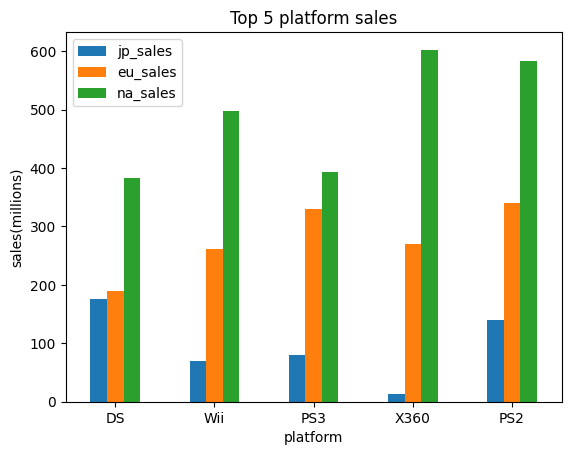

In [30]:
region_platform = region.pivot_table(index= 'platform',  
                           values=['na_sales','eu_sales','jp_sales','total_sales'], 
                           aggfunc='sum')
region_platform = region_platform.sort_values('total_sales').tail(5)
region_platform = region_platform[['jp_sales','eu_sales','na_sales']]
region_platform.plot(kind= 'bar',
                     ylabel= 'sales(millions)',
                     title= 'Top 5 platform sales',
                     rot= 360)
plt.show()

En general las ventas en norte américa son mucho mayores que en japon y en europa. Pero el mas vendido en norte america es el X360, en europa el PS3 y en japon el DS

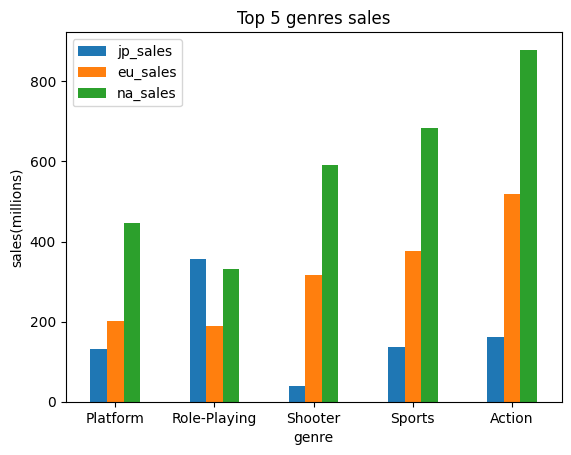

In [31]:
region_genre = region.pivot_table(index= 'genre',  
                           values=['na_sales','eu_sales','jp_sales','total_sales'], 
                           aggfunc='sum')
region_genre = region_genre.sort_values('total_sales').tail(5)
region_genre = region_genre[['jp_sales','eu_sales','na_sales']]
region_genre.plot(kind= 'bar',
                     ylabel= 'sales(millions)',
                     title= 'Top 5 genres sales',
                     rot= 360)
plt.show()

En este caso vemos que el género más vendido tanto para norte america como para europa es acción, pero si nos enfocamos en japón entonces el genero mas vendido son los juegos de role

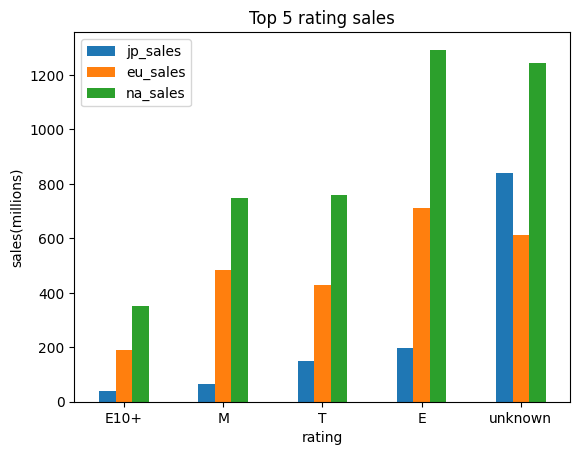

In [33]:
region_rating = region.pivot_table(index= 'rating',  
                           values=['na_sales','eu_sales','jp_sales','total_sales'], 
                           aggfunc='sum')
region_rating = region_rating.sort_values('total_sales').tail(5)
region_rating = region_rating[['jp_sales','eu_sales','na_sales']]
region_rating.plot(kind= 'bar',
                     ylabel= 'sales(millions)',
                     title= 'Top 5 rating sales',
                     rot= 360)
plt.show()

Tenemos demaciados, juegos sin una clasificacion, sería importante revisar eso antes de llegar a concluciones, aunque si descartamos los juegos sin categoría vemos que tanto para amierica del norte, como europa y japon los juegos mas vendidos son los de la clacificación "E"

**Prueba de hipótesis**

Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [34]:
user_score_xone = games[games['platform']== 'XOne']['user_score'].dropna()
user_score_pc = games[games['platform']== 'PC']['user_score'].dropna()

alpha= 0.05

xone_pc_mean_user_score = st.ttest_ind(user_score_xone, user_score_pc, equal_var=False)
print('valor p: ', xone_pc_mean_user_score.pvalue)

if (xone_pc_mean_user_score.pvalue < alpha):
    print('Rechazamos la hipótesis nula: Sus calificaciones promedio no son las mismas')
else:
    print('No podemos rechazar la hipótesis nula: Sus calificaciones promedio son las mismas')

valor p:  4.935072360183574e-06
Rechazamos la hipótesis nula: Sus calificaciones promedio no son las mismas


Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [35]:
user_score_action = games[games['genre']== 'Action']['user_score'].dropna()
user_score_sports = games[games['genre']== 'Sports']['user_score'].dropna()

alpha= 0.05

action_sports_mean_user_score = st.ttest_ind(user_score_action, user_score_sports, equal_var=False)
print('valor p: ', action_sports_mean_user_score.pvalue)

if (action_sports_mean_user_score.pvalue > alpha):
    print('No podemos rechazar la hipótesis nula: Sus calificaciones promedio no son las mismas')
else:
    print('Rechazamos la hipótesis nula: Sus calificaciones promedio son las mismas')

valor p:  0.11483818791498286
No podemos rechazar la hipótesis nula: Sus calificaciones promedio no son las mismas


**Conclusión general**


El análisis del conjunto de datos de videojuegos, una vez realizada una limpieza adecuada de valores nulos, permitió identificar tendencias relevantes. Destaca la predominancia de juegos con clasificación "E" en las ventas globales, aunque la alta proporción de títulos sin categoría (unknown) limita la solidez de algunas conclusiones y evidencia la necesidad de mejorar la calidad del registro.

Las pruebas de hipótesis muestran que existen diferencias estadísticamente significativas en las calificaciones promedio de los usuarios entre las plataformas Xbox One y PC, pero no entre los géneros Acción y Deportes, lo que sugiere que las percepciones de los usuarios varían más por plataforma que por tipo de juego.

Para estudios futuros, se recomienda profundizar en el tratamiento de datos faltantes, así como explorar con mayor detalle variables como las valoraciones de la crítica profesional y las diferencias en ventas por región.